# Students Attrition Rate

## Project Description: 

Clearwater State University offers a wide variety of degree programs, from online degrees to a doctorate in education.

Programs are offered in the streams of the arts, education, business & nursing. 

Some key strategic goals of the University are:

• Increase enrolment of students

• Improve retention, progression and graduation rates

• Recruit better academically qualified undergraduate and graduate students

• Increase external funding and recognition


## Business Questions: 

### Build a predictive model to identify students with higher early attrition risk

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [183]:
# Import and read the data
df = pd.read_excel('Student Applications & Performance.xlsx')
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [7]:
# Shape of the data
df.shape

(3400, 56)

* There are 3400 rows and 56 columns are there.

In [8]:
# column names and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

* Most of the variables are categorical in nature.
* RETURNED_2ND_YR is target variable in the dataset.
* Presence of null values are seen for both kind of variables.

In [10]:
# Variables names
df.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_

In [12]:
# Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STUDENT IDENTIFIER,3400.0,7.897155e+06,80834.212657,7755837.0,7827039.25,7899052.5,7964008.00,8037098.0
STDNT_AGE,3400.0,1.799412e+01,0.552052,16.0,18.00,18.0,18.00,26.0
STDNT_TEST_ENTRANCE1,1106.0,2.066004e+01,3.234734,8.0,18.00,20.0,22.00,32.0
STDNT_TEST_ENTRANCE2,2492.0,9.650923e+02,209.088633,350.0,900.00,990.0,1100.00,1490.0
STDNT_TEST_ENTRANCE_COMB,2882.0,9.977585e+02,156.268221,530.0,910.00,990.0,1110.00,1510.0
FIRST_TERM,3400.0,2.007770e+05,170.001298,200508.0,200608.00,200808.0,200908.00,201008.0
SECOND_TERM,3400.0,2.008710e+05,170.001298,200602.0,200702.00,200902.0,201002.00,201102.0
RETURNED_2ND_YR,3400.0,7.873529e-01,0.409240,0.0,1.00,1.0,1.00,1.0
DISTANCE_FROM_HOME,3375.0,9.982519e+01,235.196984,0.0,69.00,69.0,138.00,5932.0
HIGH_SCHL_GPA,3347.0,3.202738e+00,0.455337,0.0,2.87,3.2,3.56,4.0


In [15]:
# Five point summary
df.describe(include='object').T

,count,unique,top,freq
STDNT_GENDER,3400,2,F,2140
STDNT_BACKGROUND,3400,8,BGD 1,2082
IN_STATE_FLAG,3400,2,Y,3063
INTERNATIONAL_STS,3400,2,N,3373
STDNT_MAJOR,3400,54,Undeclared,460
STDNT_MINOR,3400,37,N,3160
CORE_COURSE_NAME_1_F,3400,69,ENGL 1101,624
CORE_COURSE_GRADE_1_F,3400,7,C,1024
CORE_COURSE_NAME_2_F,3301,74,ENGL 1101,736
CORE_COURSE_GRADE_2_F,3301,7,B,1339


# Univariant analysis

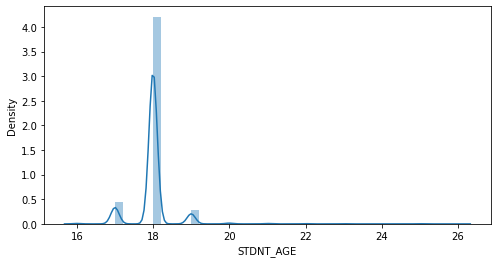

In [21]:
# Distribution of student age
plt.figure(figsize=(8,4))
sns.distplot(df['STDNT_AGE'])
plt.show()

# Most of the students are seen with the age of 18yrs.
# Fewer students are seen with age of 17yrs and 19yrs.
# It is right skewed.

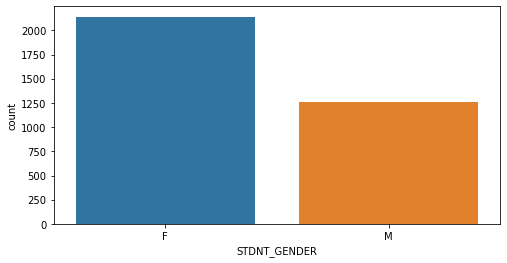

In [22]:
# Count of students wrt gender
plt.figure(figsize=(8,4))
sns.countplot(df['STDNT_GENDER'])
plt.show()

# Female students are more than male students

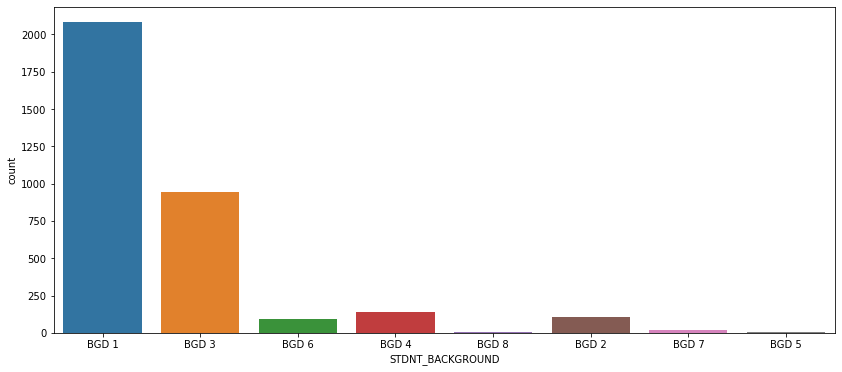

In [25]:
# Count of students wrt background
plt.figure(figsize=(14,6))
sns.countplot(df['STDNT_BACKGROUND'])
plt.show()

# More number of students are enrolled courses from BGD1 background
# Fever number of students are enrolled courses from BGD5 and bgd8 background

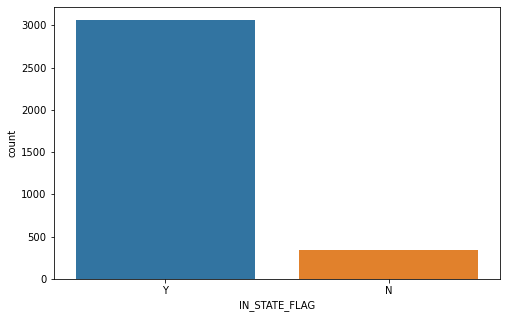

In [28]:
# Count of students wrt state
plt.figure(figsize=(8,5))
sns.countplot(df['IN_STATE_FLAG'])
plt.show()

# More number of students are enrolled are from same state.

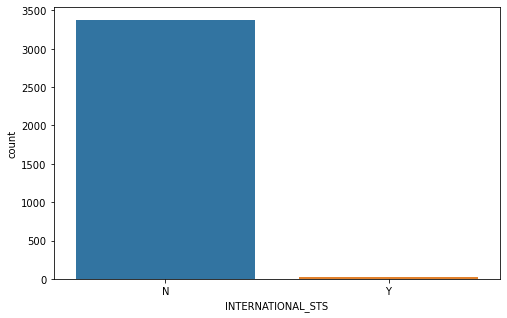

In [29]:
# Count of students wrt forign country
plt.figure(figsize=(8,5))
sns.countplot(df['INTERNATIONAL_STS'])
plt.show()

# Count of foreign students are very less or negligeble

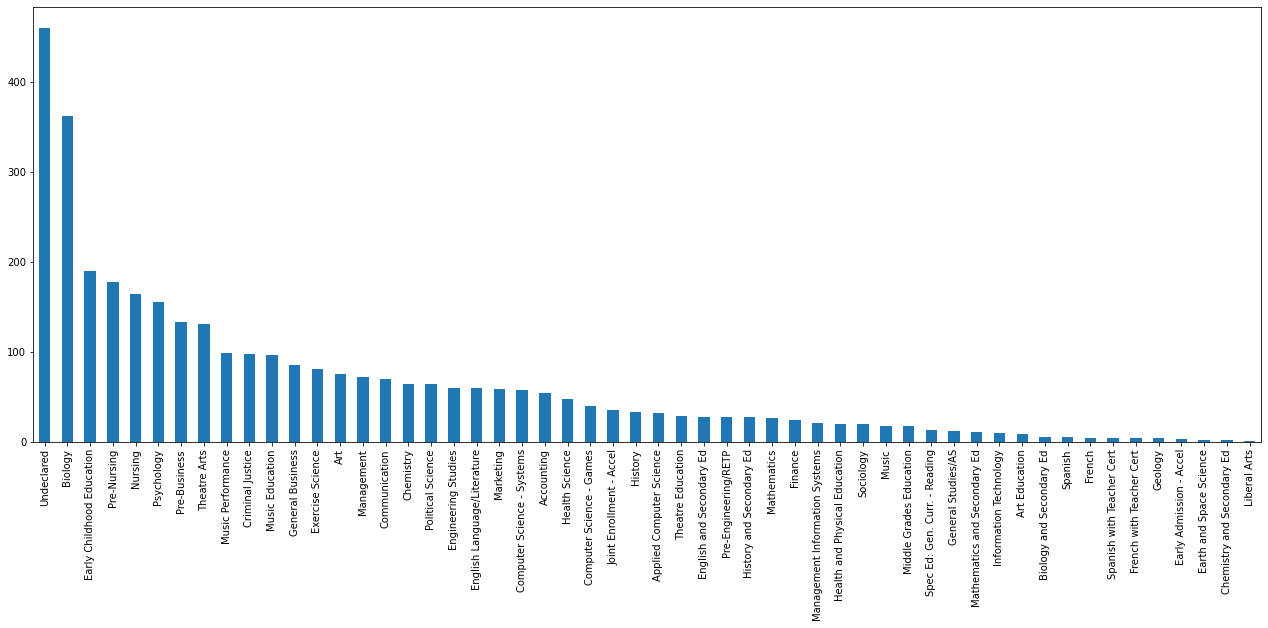

In [39]:
# Major courses choosen by students
plt.figure(figsize=(22,8))
df['STDNT_MAJOR'].value_counts().plot(kind='bar')
plt.show()

# Biology is most choosen as major subject
# Courses like liberal arts, chemistry and secondary ed, earth and space science are least choosen courses by students.

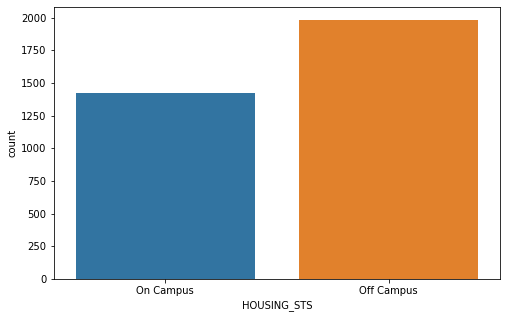

In [49]:
# Count of students wrt campus
plt.figure(figsize=(8,5))
sns.countplot(df['HOUSING_STS'])
plt.show()

# Off campus students are more seen than on-campus students

In [53]:
df['RETURNED_2ND_YR'].value_counts(normalize=True)*100

1    78.735294
0    21.264706
Name: RETURNED_2ND_YR, dtype: float64

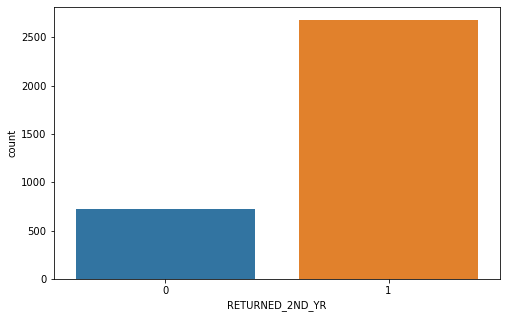

In [50]:
# Count of students returning to 2nd year
plt.figure(figsize=(8,5))
sns.countplot(df['RETURNED_2ND_YR'])
plt.show()

# More number of students are moving to next year without quitting course.
# Attrition rate of students for entire courses is around 21%.

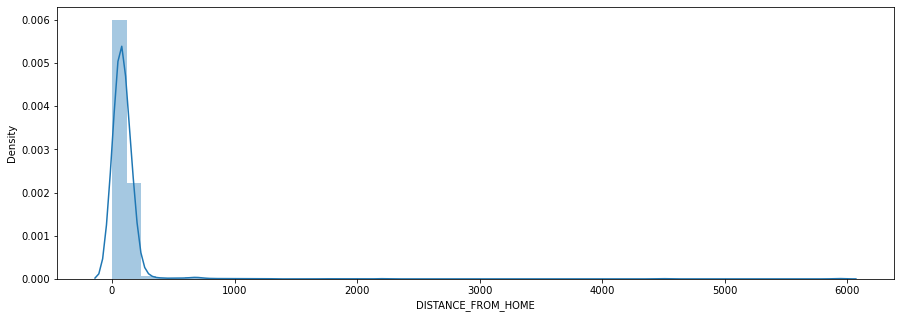

In [55]:
# Distribution of distance from home to college
plt.figure(figsize=(15,5))
sns.distplot(df['DISTANCE_FROM_HOME'])
plt.show()

# It is right skewed.

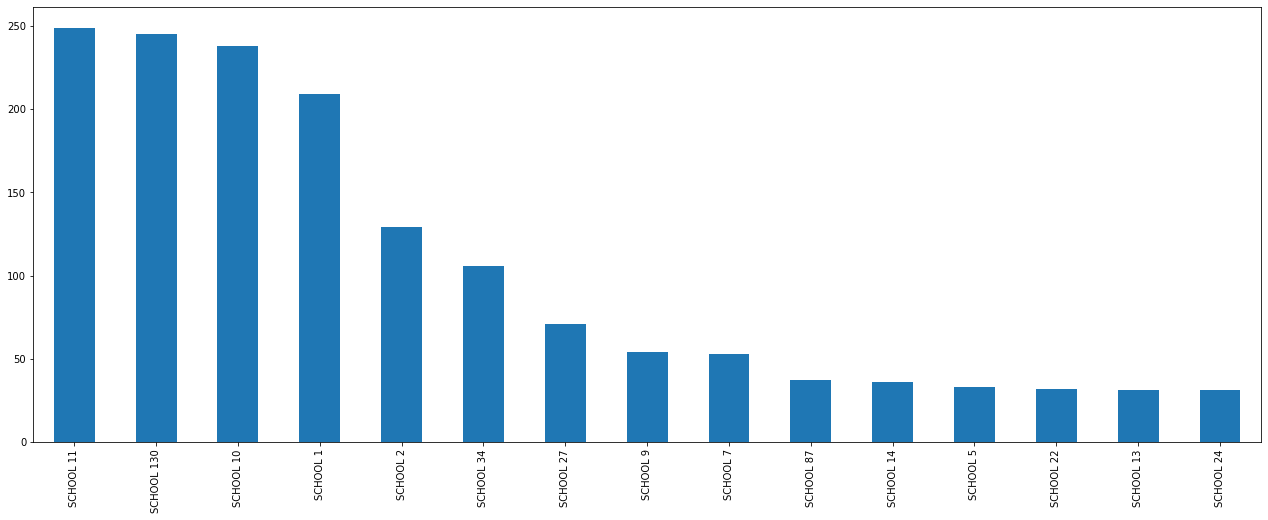

In [66]:
# Students with different high school background
plt.figure(figsize=(22,8))
df['HIGH_SCHL_NAME'].value_counts().head(15).plot(kind='bar')
plt.show()


# More number of students have same high school backgrounds such school10, school11 and school130.

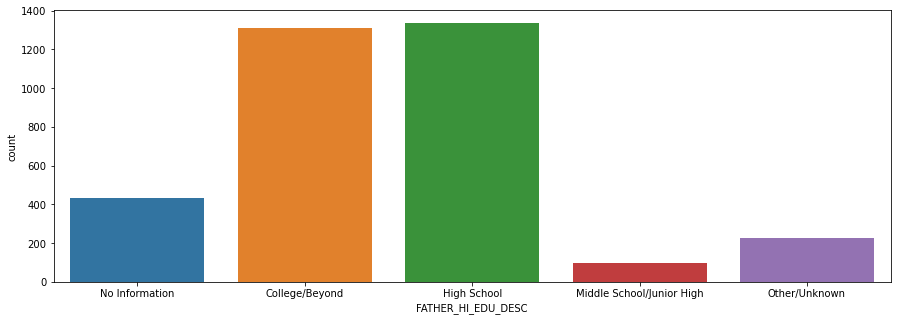

In [68]:
# Education of student's father
plt.figure(figsize=(15,5))
sns.countplot(df['FATHER_HI_EDU_DESC'])
plt.show()

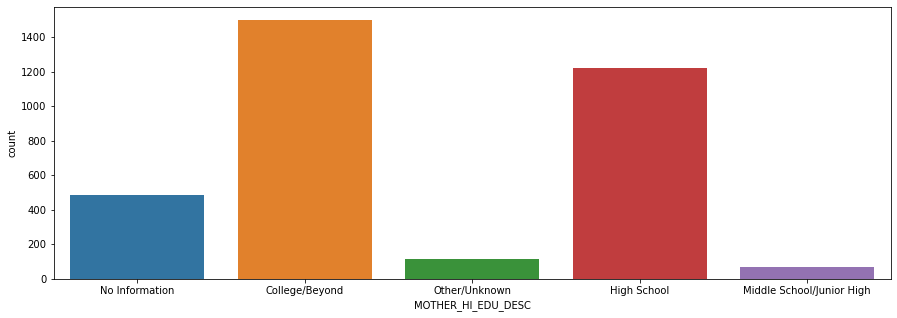

In [70]:
# Education of student's mother
plt.figure(figsize=(15,5))
sns.countplot(df['MOTHER_HI_EDU_DESC'])
plt.show()

* Most of the parents have education level above High school and College/Beyond

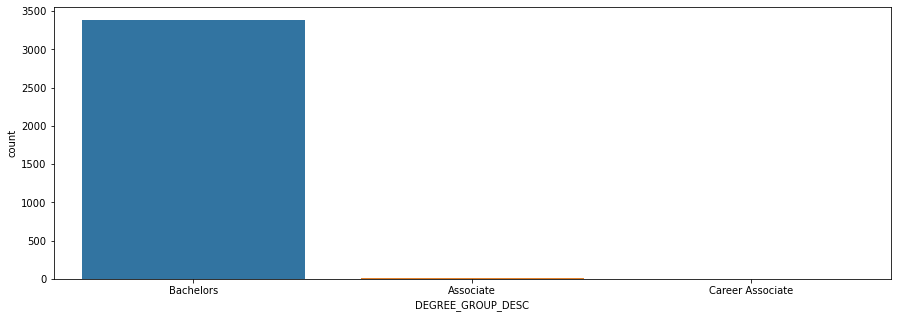

In [72]:
# Students enrolment for different degree levels
plt.figure(figsize=(15,5))
sns.countplot(df['DEGREE_GROUP_DESC'])
plt.show()

# Enrolment for Bachelors degree is too high compared to other degree levels

# Bivariant and Multivariant analysis

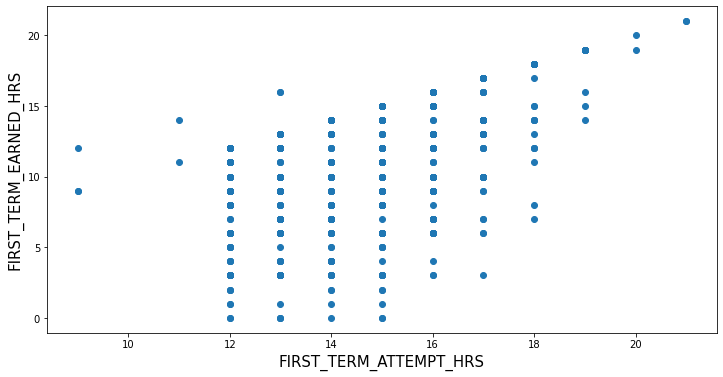

In [81]:
plt.figure(figsize=(12,6))
plt.scatter(df['FIRST_TERM_ATTEMPT_HRS'], df['FIRST_TERM_EARNED_HRS'])
plt.xlabel('FIRST_TERM_ATTEMPT_HRS', fontsize=15)
plt.ylabel('FIRST_TERM_EARNED_HRS', fontsize=15)
plt.show()

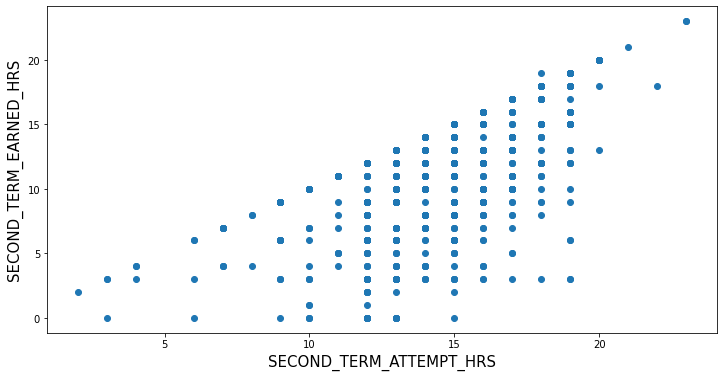

In [82]:
plt.figure(figsize=(12,6))
plt.scatter(df['SECOND_TERM_ATTEMPT_HRS'], df['SECOND_TERM_EARNED_HRS'])
plt.xlabel('SECOND_TERM_ATTEMPT_HRS', fontsize=15)
plt.ylabel('SECOND_TERM_EARNED_HRS', fontsize=15)
plt.show()

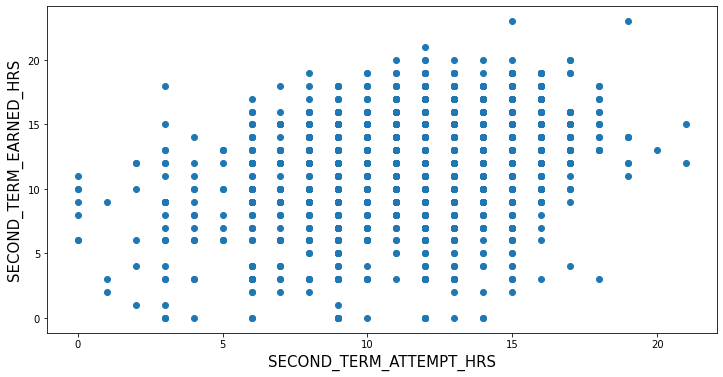

In [86]:
plt.figure(figsize=(12,6))
plt.scatter(df['FIRST_TERM_EARNED_HRS'], df['SECOND_TERM_EARNED_HRS'])
plt.xlabel('SECOND_TERM_ATTEMPT_HRS', fontsize=15)
plt.ylabel('SECOND_TERM_EARNED_HRS', fontsize=15)
plt.show()

In [91]:
df1 = df[df['RETURNED_2ND_YR'] == 1]
df0 = df[df['RETURNED_2ND_YR'] == 0]

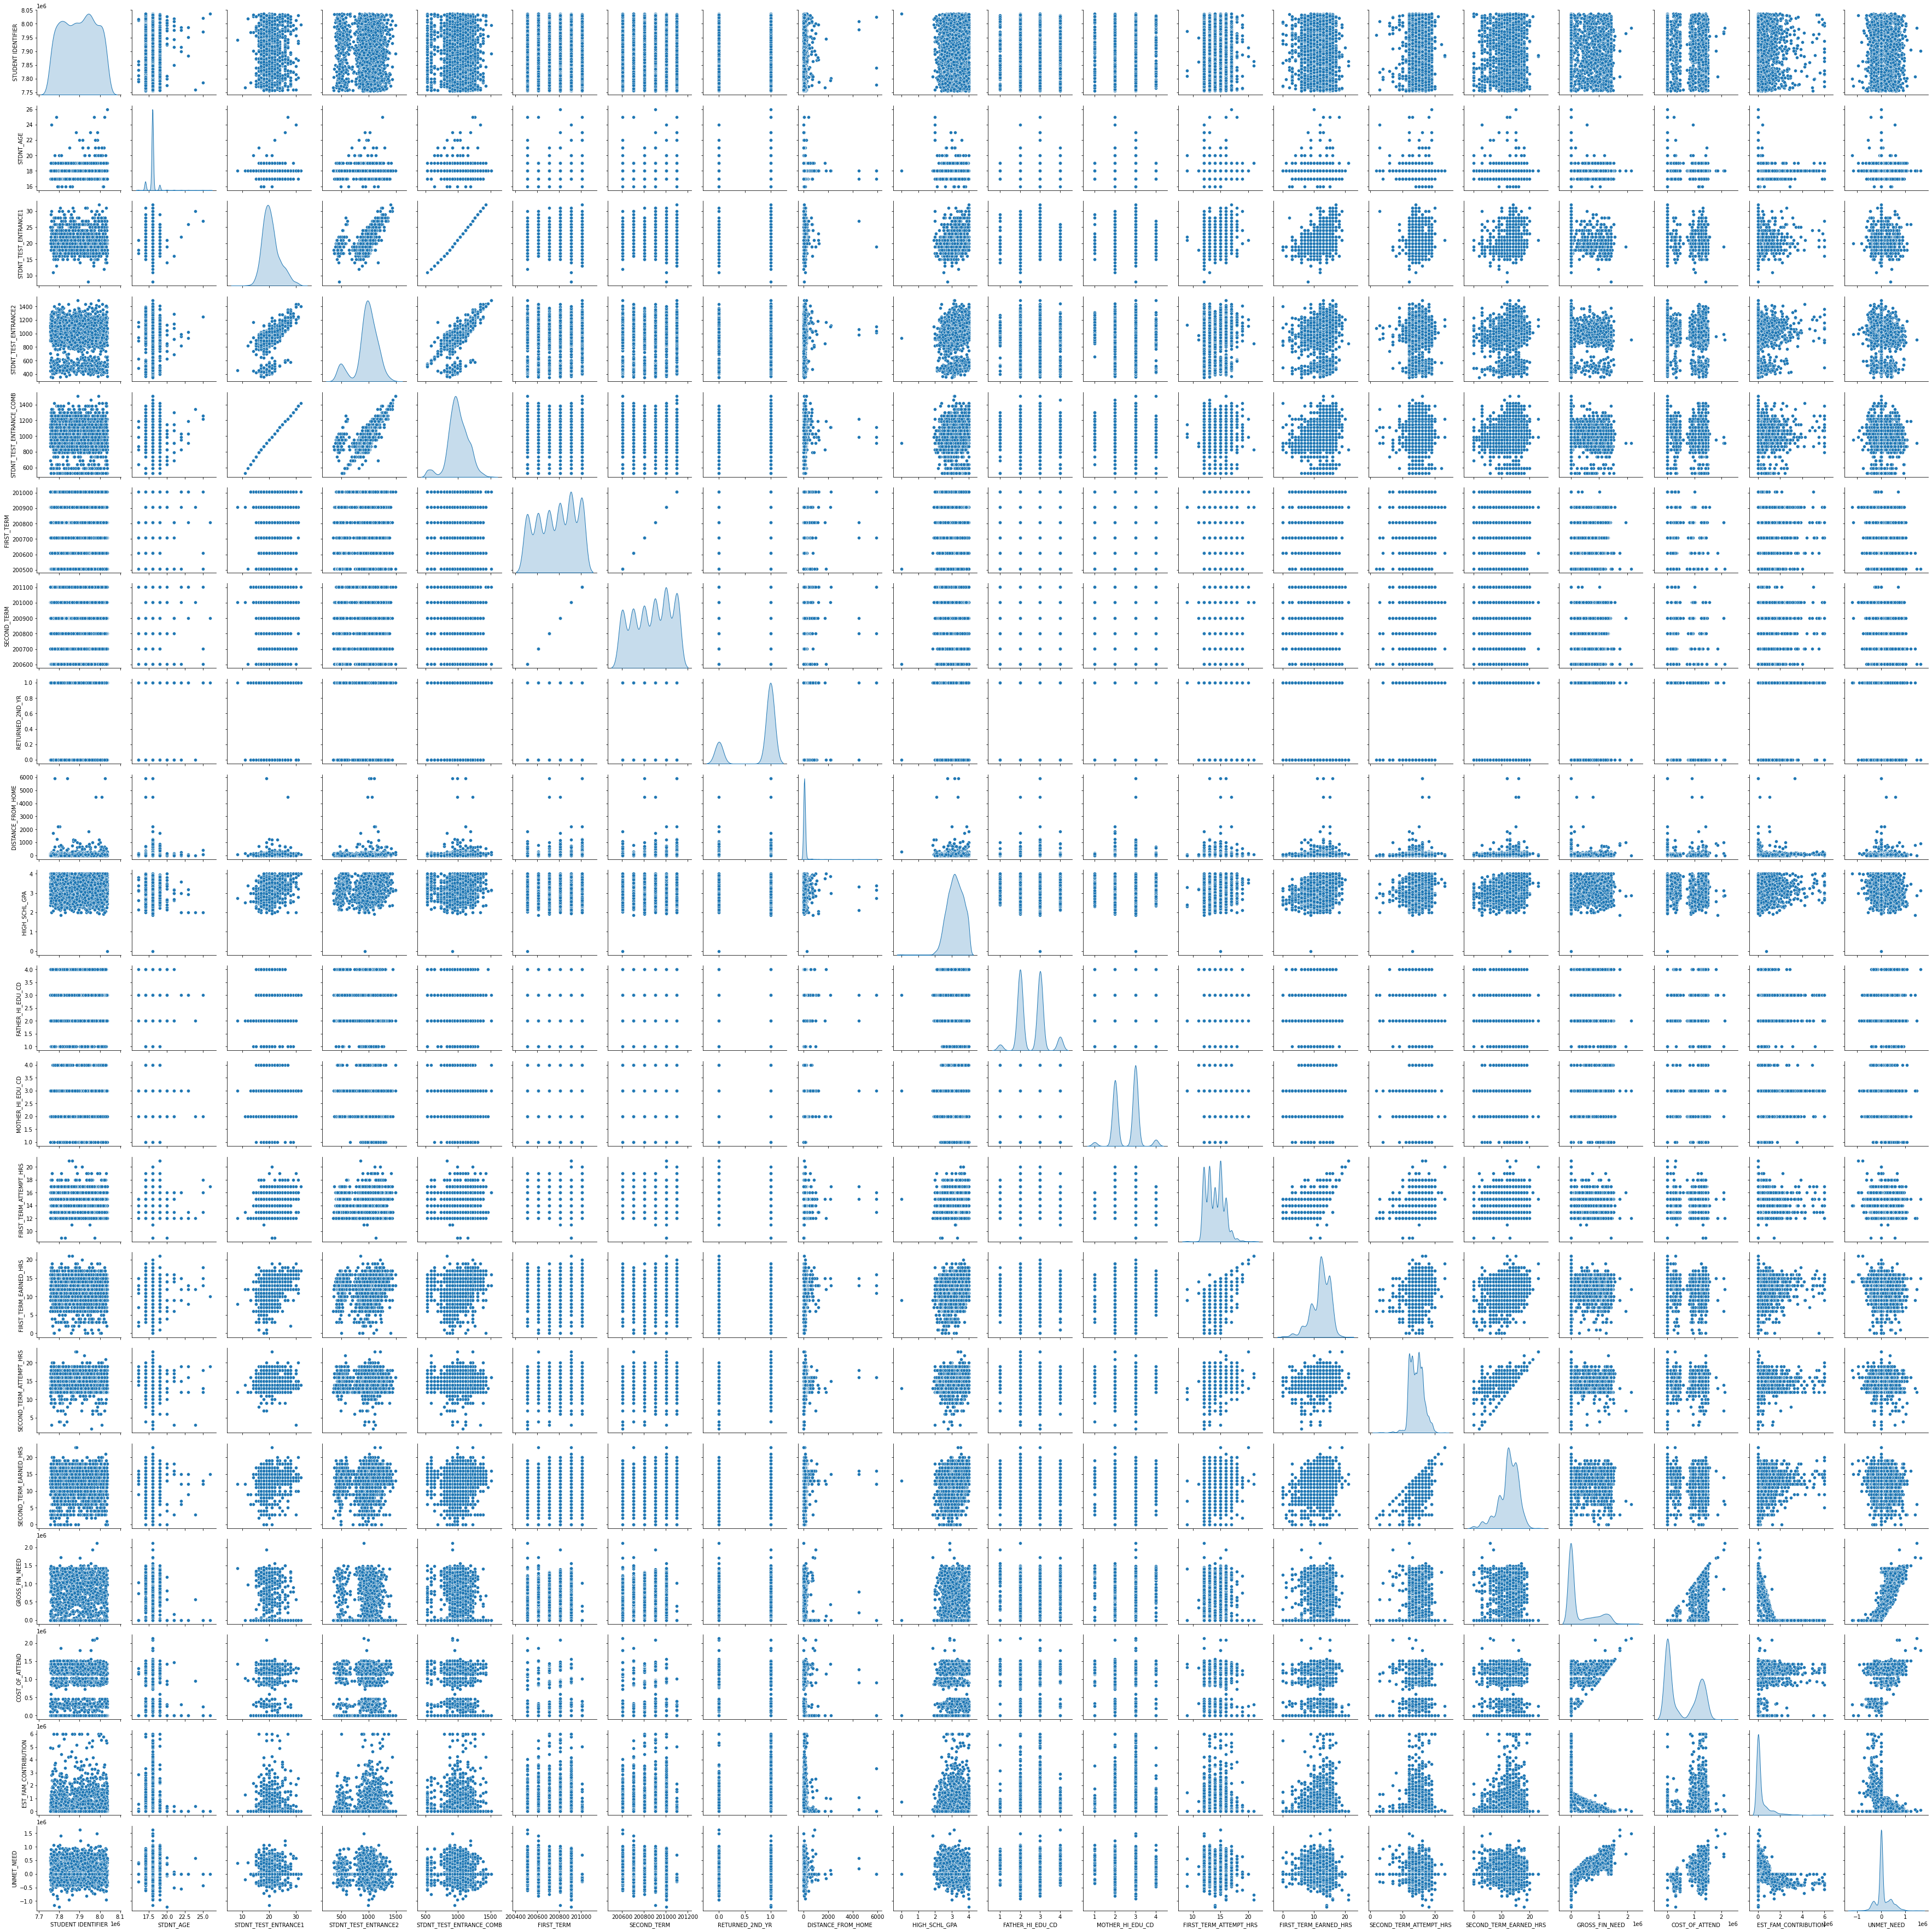

In [96]:
# Distribution plot for all variables
sns.pairplot(df, diag_kind='kde')
plt.show()

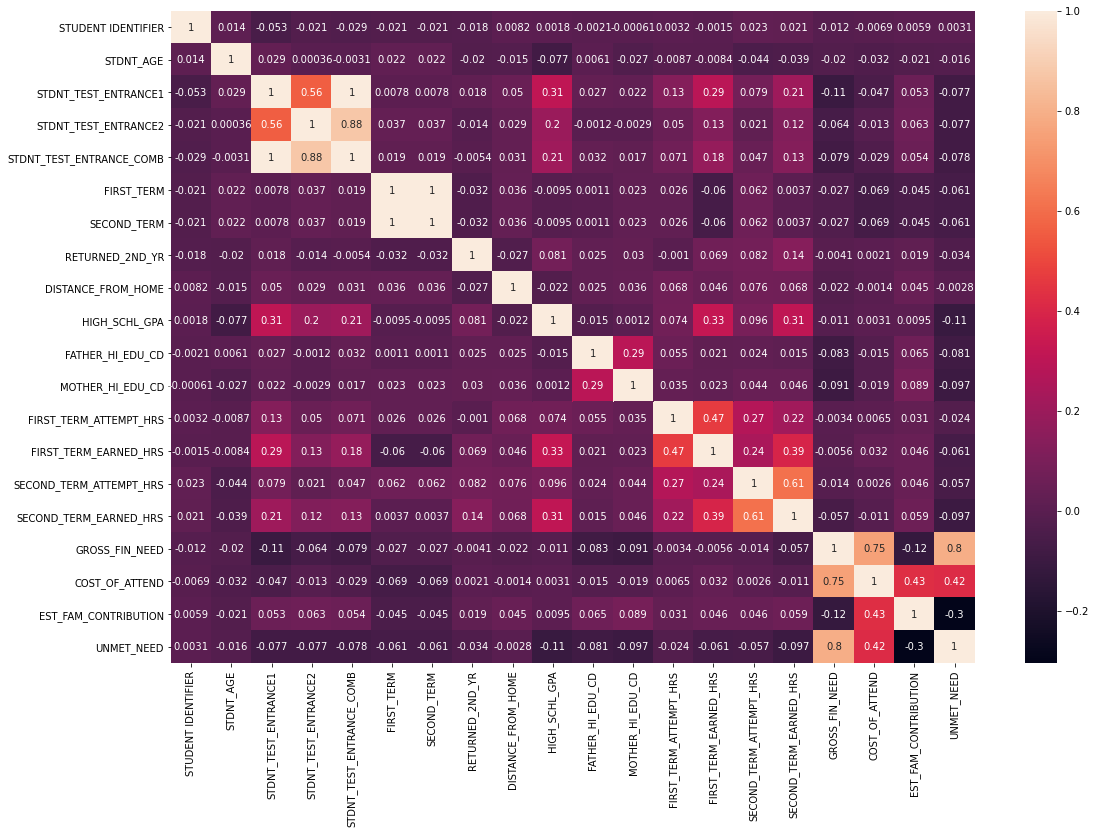

In [98]:
# Correlation map for different variables
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()


# The variables STDNT_TEST_ENTRANCE1 and STDNT_TEST_ENTRANCE2 have strong correlation with STDNT_TEST_ENTRANCE_COMB.
# The variables FIRST_TERM and SECOND_TERM also have strong correlation with each other.
# The variables UNMET_NEED and GROSS_FIN_NEED shows strong correlation with r=0.8
# The variables COST_OF_ATTEND and GROSS_FIN_NEED shows strong correlation with r=0.75
# Above variables may cause multicollinearity between them.
# most of variables do not shows strong correlation with target variables.

# Null values treatment

In [184]:
# Null values in each variable
df_null = df.isnull().sum() / df.shape[0] * 100
df_null

# Drop the variables having more than 60% of null values
# For other variables use Iterative imputer technique to impute the null values

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB    15.235294
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

In [185]:
# Remove/drop the variables having more than 60% null values
df_null[df_null > 60]

STDNT_TEST_ENTRANCE1     67.470588
CORE_COURSE_NAME_5_F     81.029412
CORE_COURSE_GRADE_5_F    81.029412
CORE_COURSE_NAME_6_F     96.235294
CORE_COURSE_GRADE_6_F    96.235294
CORE_COURSE_NAME_4_S     60.147059
CORE_COURSE_GRADE_4_S    60.147059
CORE_COURSE_NAME_5_S     86.764706
CORE_COURSE_GRADE_5_S    86.764706
CORE_COURSE_NAME_6_S     97.617647
CORE_COURSE_GRADE_6_S    97.617647
dtype: float64

In [186]:
cols = df_null[df_null > 60].index
df.drop(columns=cols, axis=1, inplace=True)

In [187]:
# Lets consider insignificant variables 
cols = ['STUDENT IDENTIFIER', 'STDNT_MAJOR', 'STDNT_MINOR', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_NAME_2_F', 
       'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S', 'CORE_COURSE_NAME_2_S', 
       'CORE_COURSE_NAME_3_S', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 
        'DEGREE_GROUP_CD']

df.drop(columns=cols, axis=1, inplace=True)

In [188]:
cols = ['STDNT_GENDER', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'DEGREE_GROUP_DESC', 'HOUSING_STS']
df = pd.get_dummies(df, columns=cols, drop_first=True)

In [189]:
cols = ['STDNT_BACKGROUND', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_GRADE_3_F',
        'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_GRADE_3_S', 
       'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC']

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

lis = []
for i in cols:
    a = le.fit_transform(df[i])
    lis.append(a)

In [191]:
df[cols] = pd.DataFrame(lis, index=cols).T

In [196]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lir = LinearRegression()
it = IterativeImputer(estimator=lir, max_iter=30, verbose=3)
df1 = pd.DataFrame(it.fit_transform(df), columns=df.columns)

[IterativeImputer] Completing matrix with shape (3400, 30)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.13
[IterativeImputer] Change: 519.1948142206313, scaled tolerance: 5999.9400000000005 
[IterativeImputer] Early stopping criterion reached.


In [198]:
df1.isnull().sum().sum()

0

# Outliers treatement

Variable name : STDNT_AGE


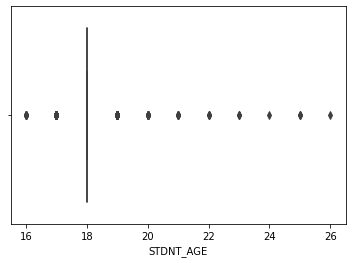

Variable name : STDNT_BACKGROUND


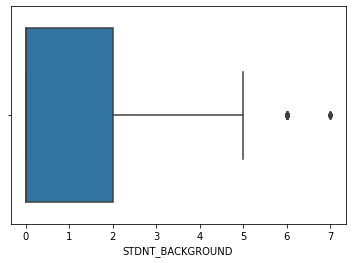

Variable name : STDNT_TEST_ENTRANCE2


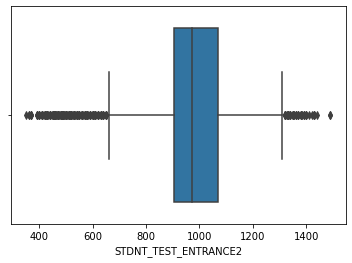

Variable name : STDNT_TEST_ENTRANCE_COMB


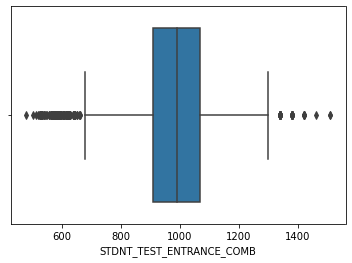

Variable name : CORE_COURSE_GRADE_1_F


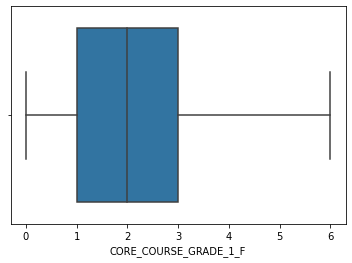

Variable name : CORE_COURSE_GRADE_2_F


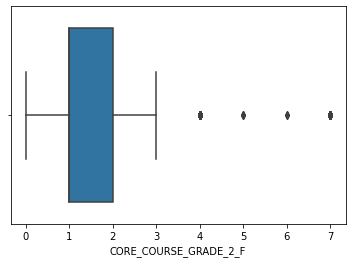

Variable name : CORE_COURSE_GRADE_3_F


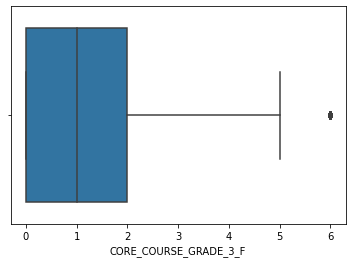

Variable name : CORE_COURSE_GRADE_4_F


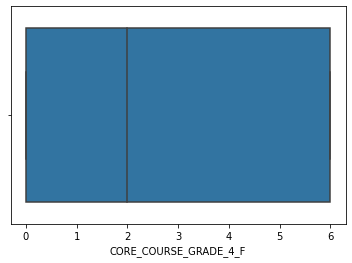

Variable name : CORE_COURSE_GRADE_1_S


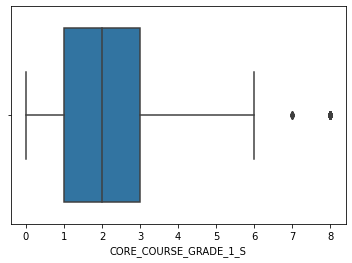

Variable name : CORE_COURSE_GRADE_2_S


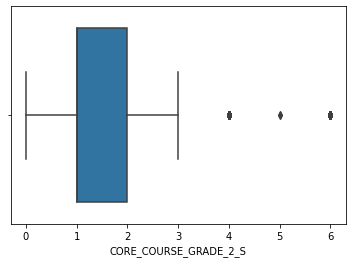

Variable name : CORE_COURSE_GRADE_3_S


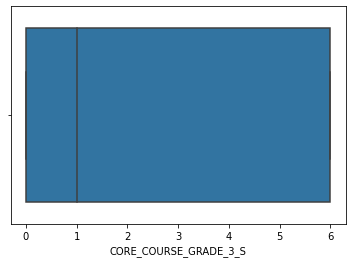

Variable name : RETURNED_2ND_YR


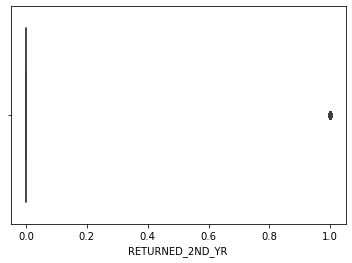

Variable name : DISTANCE_FROM_HOME


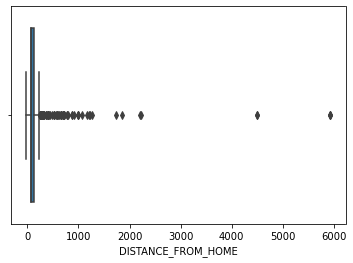

Variable name : HIGH_SCHL_GPA


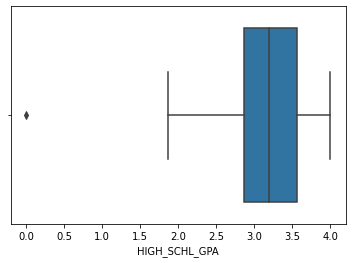

Variable name : FATHER_HI_EDU_DESC


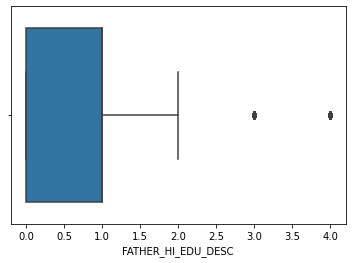

Variable name : MOTHER_HI_EDU_DESC


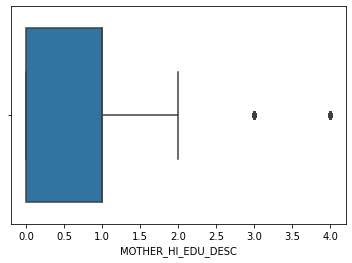

Variable name : FIRST_TERM_ATTEMPT_HRS


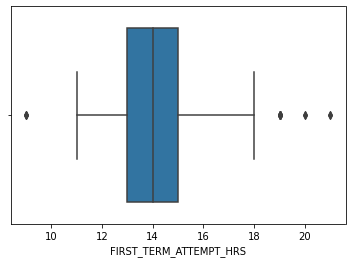

Variable name : FIRST_TERM_EARNED_HRS


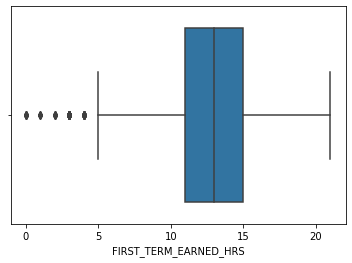

Variable name : SECOND_TERM_ATTEMPT_HRS


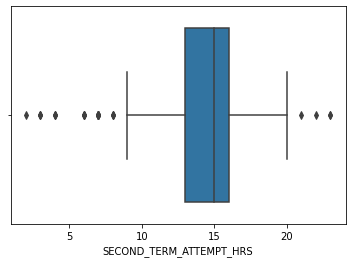

Variable name : SECOND_TERM_EARNED_HRS


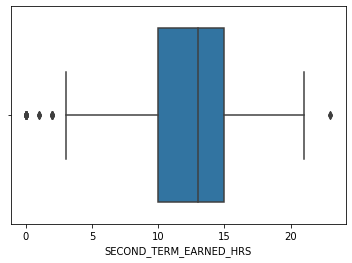

Variable name : GROSS_FIN_NEED


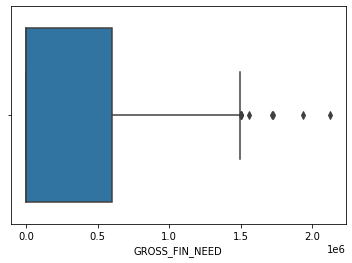

Variable name : COST_OF_ATTEND


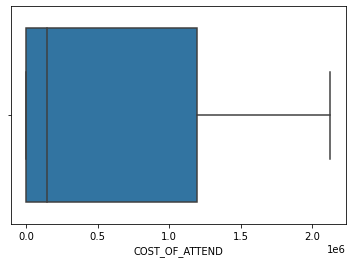

Variable name : EST_FAM_CONTRIBUTION


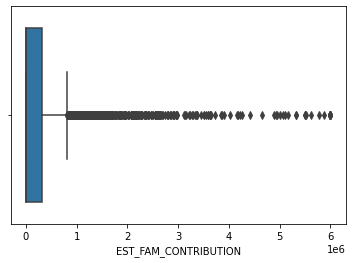

Variable name : UNMET_NEED


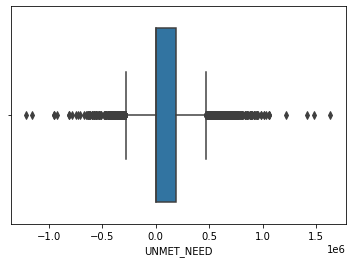

Variable name : STDNT_GENDER_M


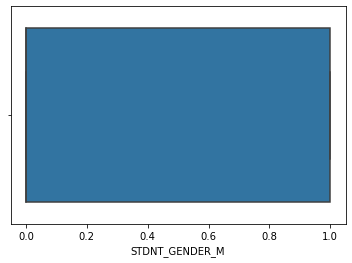

Variable name : IN_STATE_FLAG_Y


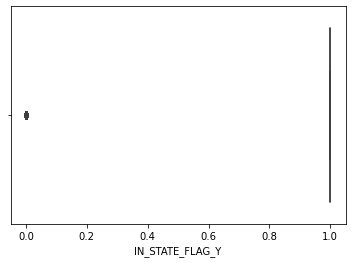

Variable name : INTERNATIONAL_STS_Y


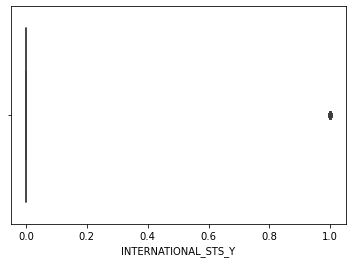

Variable name : DEGREE_GROUP_DESC_Bachelors


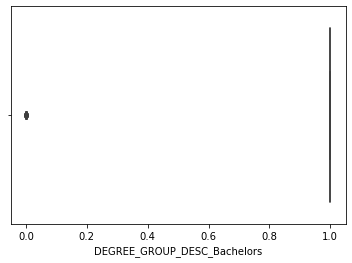

Variable name : DEGREE_GROUP_DESC_Career Associate


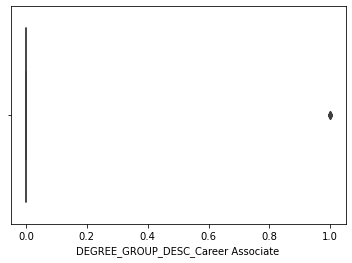

Variable name : HOUSING_STS_On Campus


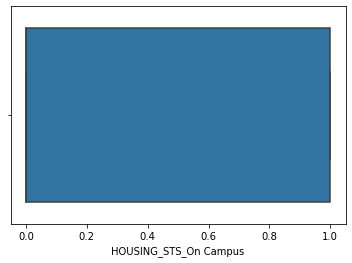

In [264]:
for i in df1.columns:
    print('Variable name :', i)
    sns.boxplot(df1[i])
    plt.show()
    
# Presence of outliers are seen and treated using powertransformation technique

In [265]:
# Transforming outliers
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

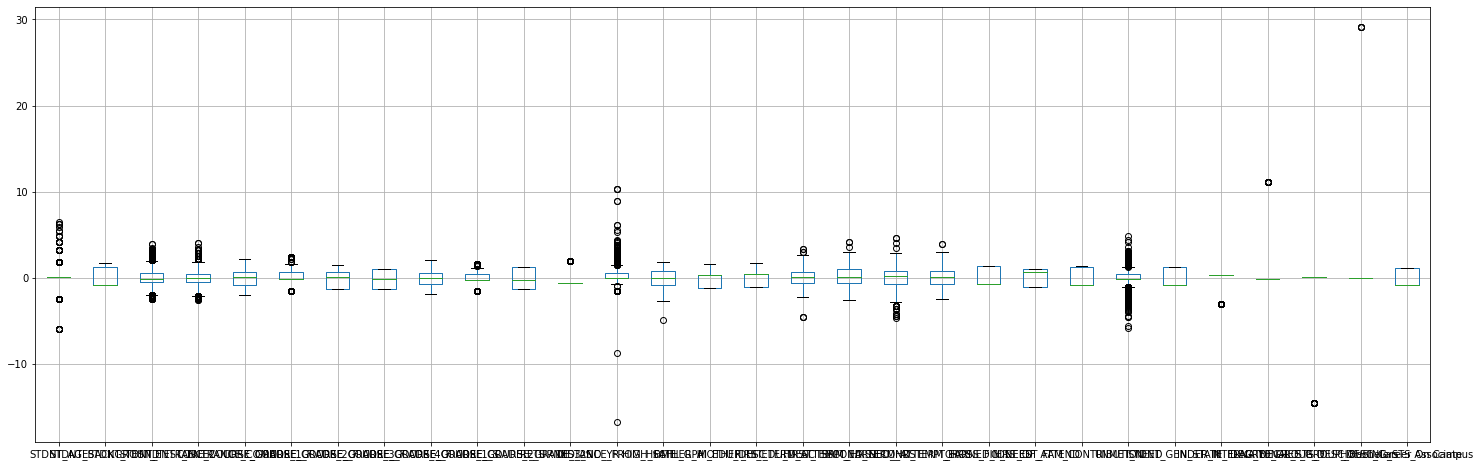

In [266]:
# Boxplot after normalizing outliers
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()

In [287]:
# Swapping categories in target
df1['RETURNED_2ND_YR'] = df1['RETURNED_2ND_YR'].replace({1:0, 0:1})

df1.to_csv('df1.csv')

df1_pt.to_csv('df1_pt.csv')

# Model Building

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [288]:
y = df1['RETURNED_2ND_YR']
x = df1_pt.drop('RETURNED_2ND_YR', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Logistic Regression (Base model)

In [387]:
lor = LogisticRegression(solver='liblinear')
lor.fit(x_train, y_train)

y_train_pred = lor.predict(x_train)
y_train_prob = lor.predict_proba(x_train)[:, 1]

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_train, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_train, y_train_prob))
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.8302521008403362
Roc auc score for train : 0.7349840326419732
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1891
           1       0.75      0.26      0.39       489

    accuracy                           0.83      2380
   macro avg       0.79      0.62      0.64      2380
weighted avg       0.82      0.83      0.80      2380


Accuracy score for test : 0.8166666666666667
Roc auc score for test : 0.7196940040451492
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       786
           1       0.75      0.30      0.43       234

    accuracy                           0.82      1020
   macro avg       0.79      0.64      0.66      1020
weighted avg       0.81      0.82      0.79      1020

[[762  24]
 [163  71]]


# Applying SMOTE

In [294]:
sm = SMOTE(sampling_strategy='minority')
x_trains, y_trains = sm.fit_resample(x_train, y_train)

In [346]:
y_trains.value_counts()

1    1891
0    1891
Name: RETURNED_2ND_YR, dtype: int64

In [388]:
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains, y_trains)

y_train_pred = lor.predict(x_trains)
y_train_prob = lor.predict_proba(x_trains)[:, 1]

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.6882601797990481
Roc auc score for train : 0.756697999737687
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1891
           1       0.70      0.67      0.68      1891

    accuracy                           0.69      3782
   macro avg       0.69      0.69      0.69      3782
weighted avg       0.69      0.69      0.69      3782


Accuracy score for test : 0.6813725490196079
Roc auc score for test : 0.7233150649181183
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       786
           1       0.38      0.65      0.48       234

    accuracy                           0.68      1020
   macro avg       0.63      0.67      0.63      1020
weighted avg       0.76      0.68      0.70      1020

[[544 242]
 [ 83 151]]


* In base model, precision score is good but recall score very poor.
* Base model with SMOTE, precision score is poor but recall score improved.
* Also significant drop in Accuracy and Roc score is observed

# Feature selection using RFE

In [396]:
from sklearn.feature_selection import RFE, RFECV

lor = LogisticRegression(solver='liblinear')
rfecv = RFECV(estimator=lor, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3, min_features_to_select=25)
rfecv.fit(x, y)

Fitting estimator with 29 features.
Fitting estimator with 28 features.


RFECV(cv=5, estimator=LogisticRegression(solver='liblinear'),
      min_features_to_select=25, n_jobs=-1, scoring='roc_auc', verbose=3)

In [397]:
rfecv.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [398]:
x_trains_fs = x_trains.loc[:, rfecv.support_]
x_test_fs = x_test.loc[:, rfecv.support_]

In [400]:
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains_fs, y_trains)

y_train_pred = lor.predict(x_trains_fs)
y_train_prob = lor.predict_proba(x_trains_fs)[:, 1]

y_test_pred = lor.predict(x_test_fs)
y_test_prob = lor.predict_proba(x_test_fs)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.686409307244844
Roc auc score for train : 0.7565573351014757
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1891
           1       0.69      0.66      0.68      1891

    accuracy                           0.69      3782
   macro avg       0.69      0.69      0.69      3782
weighted avg       0.69      0.69      0.69      3782


Accuracy score for test : 0.6813725490196079
Roc auc score for test : 0.7240381896870447
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       786
           1       0.38      0.65      0.48       234

    accuracy                           0.68      1020
   macro avg       0.63      0.67      0.63      1020
weighted avg       0.76      0.68      0.70      1020

[[544 242]
 [ 83 151]]


* After feature selection using RFE method, no improvement in model parameters is observed.

# Decision tree

In [401]:
# decision tree model without tuning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_trains, y_trains)

y_train_pred = dtc.predict(x_trains)
y_train_prob = dtc.predict_proba(x_trains)[:, 1]

y_test_pred = dtc.predict(x_test)
y_test_prob = dtc.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 1.0
Roc auc score for train : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1891
           1       1.00      1.00      1.00      1891

    accuracy                           1.00      3782
   macro avg       1.00      1.00      1.00      3782
weighted avg       1.00      1.00      1.00      3782


Accuracy score for test : 0.7264705882352941
Roc auc score for test : 0.6154335486396554
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       786
           1       0.41      0.41      0.41       234

    accuracy                           0.73      1020
   macro avg       0.61      0.62      0.61      1020
weighted avg       0.73      0.73      0.73      1020

[[645 141]
 [138  96]]


In [436]:
# Hyper parameter tuning using RandomizedsearchCV approach
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'max_depth':sp_randint(1, 50), 'min_samples_split':sp_randint(2, 20), 
          'max_features':['auto', 'sqrt', 'log2']}
rcv = RandomizedSearchCV(estimator=dtc, param_distributions=params, cv=5,n_iter=500, n_jobs=-1, scoring='roc_auc', verbose=3)
rcv.fit(x, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA685280>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA667310>},
                   scoring='roc_auc', verbose=3)

In [437]:
best_param = rcv.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [438]:
# Decision tree model with hyper parameter tuning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(**rcv.best_params_)
dtc.fit(x_trains, y_trains)

y_train_pred = dtc.predict(x_trains)
y_train_prob = dtc.predict_proba(x_trains)[:, 1]

y_test_pred = dtc.predict(x_test)
y_test_prob = dtc.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.6877313590692755
Roc auc score for train : 0.7156387474862838
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1891
           1       0.72      0.62      0.66      1891

    accuracy                           0.69      3782
   macro avg       0.69      0.69      0.69      3782
weighted avg       0.69      0.69      0.69      3782

[[1429  462]
 [ 719 1172]]

Accuracy score for test : 0.7176470588235294
Roc auc score for test : 0.6958879754681282
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       786
           1       0.42      0.57      0.48       234

    accuracy                           0.72      1020
   macro avg       0.64      0.67      0.64      1020
weighted avg       0.76      0.72      0.73      1020

[[598 188]
 [100 134]]


* Decision tree without tuning is over fiting model.
* Decision tree model after tuning both f1 score, recall score are improved significantly.
* Even ROC score is also improved to significant level.

# Random forest

In [469]:
# Random forest model without tuning
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_trains, y_trains)

y_train_pred = rfc.predict(x_trains)
y_train_prob = rfc.predict_proba(x_trains)[:, 1]

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 1.0
Roc auc score for train : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1891
           1       1.00      1.00      1.00      1891

    accuracy                           1.00      3782
   macro avg       1.00      1.00      1.00      3782
weighted avg       1.00      1.00      1.00      3782

[[1891    0]
 [   0 1891]]

Accuracy score for test : 0.8284313725490197
Roc auc score for test : 0.7411648289510885
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       786
           1       0.76      0.37      0.50       234

    accuracy                           0.83      1020
   macro avg       0.80      0.67      0.70      1020
weighted avg       0.82      0.83      0.81      1020

[[758  28]
 [147  87]]


In [474]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()
params = {'max_depth':sp_randint(2, 50), 'n_estimators':sp_randint(100, 400), 'min_samples_split':sp_randint(2, 20), 
          'criterion':['gini', 'entropy'], 'max_features':['auto', 'sqrt', 'log2']}
rs = RandomizedSearchCV(rfc, param_distributions=params, scoring='roc_auc', cv=3, n_iter=150, n_jobs=-1, random_state=10, verbose=3)
rs.fit(x, y)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA6450A0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA517DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB0EDCA0>},
                   random_state=10, scoring='roc_auc', verbose=3)

In [476]:
# Best parameters after tuning
best_params = rs.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 116}

In [477]:
# Random forest model with tuning
rfc = RandomForestClassifier(**rs.best_params_)
rfc.fit(x_trains, y_trains)

y_train_pred = rfc.predict(x_trains)
y_train_prob = rfc.predict_proba(x_trains)[:, 1]

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.7231623479640402
Roc auc score for train : 0.8010653878023346
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1891
           1       0.77      0.64      0.70      1891

    accuracy                           0.72      3782
   macro avg       0.73      0.72      0.72      3782
weighted avg       0.73      0.72      0.72      3782

[[1533  358]
 [ 689 1202]]

Accuracy score for test : 0.7519607843137255
Roc auc score for test : 0.7287684043409234
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       786
           1       0.47      0.56      0.51       234

    accuracy                           0.75      1020
   macro avg       0.66      0.68      0.67      1020
weighted avg       0.77      0.75      0.76      1020

[[637 149]
 [104 130]]


* RF model without tuning is over fitting model.
* RF with tuning, recall score is better but no improvement compared to decision tree model.

# light gbm

In [478]:
# Lightgbm without tuning
import lightgbm as lgb
lg = lgb.LGBMClassifier()

lg.fit(x_trains, y_trains)

y_train_pred = lg.predict(x_trains)
y_train_prob = lg.predict_proba(x_trains)[:, 1]

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.9830777366472766
Roc auc score for train : 0.9998864615461196
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1891
           1       1.00      0.97      0.98      1891

    accuracy                           0.98      3782
   macro avg       0.98      0.98      0.98      3782
weighted avg       0.98      0.98      0.98      3782

[[1890    1]
 [  63 1828]]

Accuracy score for test : 0.8215686274509804
Roc auc score for test : 0.7337215371566516
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       786
           1       0.73      0.35      0.48       234

    accuracy                           0.82      1020
   macro avg       0.78      0.66      0.68      1020
weighted avg       0.81      0.82      0.80      1020

[[755  31]
 [151  83]]


In [489]:
from scipy.stats import uniform as sp_uniform
lg = lgb.LGBMClassifier()
params = {'max_depth':sp_randint(2, 50), 'n_estimators':sp_randint(100, 300), 'num_leaves':sp_randint(31, 50), 
          'boosting_type':['gbdt', 'dart', 'goss'], 'learning_rate':sp_uniform(0.1, 0.4)}
rs = RandomizedSearchCV(lg, param_distributions=params, scoring='roc_auc', cv=5, n_iter=200, n_jobs=-1, verbose=3)
rs.fit(x, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA50A2B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB15E550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB958040>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DA4ADA90>},
                   scoring='roc_auc', verbose=3)

In [490]:
# Best parameters
best_params = rs.best_params_
best_params

{'boosting_type': 'goss',
 'learning_rate': 0.42914750617493214,
 'max_depth': 2,
 'n_estimators': 103,
 'num_leaves': 31}

In [491]:
# Lightgbm model with tuning
lg = lgb.LGBMClassifier(**rs.best_params_)
lg.fit(x_trains, y_trains)

y_train_pred = lg.predict(x_trains)
y_train_prob = lg.predict_proba(x_trains)[:, 1]

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()

print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.902432575356954
Roc auc score for train : 0.9560771177788074
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1891
           1       0.94      0.86      0.90      1891

    accuracy                           0.90      3782
   macro avg       0.91      0.90      0.90      3782
weighted avg       0.91      0.90      0.90      3782

[[1794   97]
 [ 272 1619]]

Accuracy score for test : 0.7872549019607843
Roc auc score for test : 0.7238043974685195
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       786
           1       0.55      0.40      0.46       234

    accuracy                           0.79      1020
   macro avg       0.69      0.65      0.67      1020
weighted avg       0.77      0.79      0.77      1020

[[709  77]
 [140  94]]


# XG Boost

In [497]:
# XGboost without tuning
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x_trains, y_trains)

y_train_pred = xg.predict(x_trains)
y_train_prob = xg.predict_proba(x_trains)[:, 1]

y_test_pred = xg.predict(x_test)
y_test_prob = xg.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()

print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[14:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for train : 0.9997355896351137
Roc auc score for train : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1891
           1       1.00      1.00      1.00      1891

    accuracy                           1.00      3782
   macro avg       1.00      1.00      1.00      3782
weighted avg       1.00      1.00      1.00      3782

[[1891    0]
 [   1 1890]]

Accuracy score for test : 0.8117647058823529
Roc auc score for test : 0.7301929057654248
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       786
           1       0.65      0.39      0.49       234

    ac

In [508]:
from scipy.stats import uniform as sp_uniform
xg = xgb.XGBClassifier()
params = {'n_estimators':sp_randint(100, 300), 'max_depth':sp_randint(2, 50),'min_child_weight':sp_randint(1,6,2), 
         'gamma':[i/10.0 for i in range(0,5)], 'subsample':[i/10.0 for i in range(6,10)], 
          'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05], 'colsample_bytree':[i/10.0 for i in range(6,10)]}
rs = RandomizedSearchCV(xg, param_distributions=params, scoring='roc_auc', cv=5, n_iter=250, n_jobs=-1, verbose=3)
rs.fit(x, y)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[14:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DACE2610>,
                                        'min_child_w

In [509]:
# Best parameters
best_params = rs.best_params_
best_params

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 109,
 'reg_alpha': 0.05,
 'subsample': 0.6}

In [510]:
# XGboost model with tuning
xg = xgb.XGBClassifier(**rs.best_params_)
xg.fit(x_trains, y_trains)

y_train_pred = xg.predict(x_trains)
y_train_prob = xg.predict_proba(x_trains)[:, 1]

y_test_pred = xg.predict(x_test)
y_test_prob = xg.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()

print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[14:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for train : 0.9338974087784241
Roc auc score for train : 0.9833906665238581
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1891
           1       0.98      0.88      0.93      1891

    accuracy                           0.93      3782
   macro avg       0.94      0.93      0.93      3782
weighted avg       0.94      0.93      0.93      3782

[[1863   28]
 [ 222 1669]]

Accuracy score for test : 0.8205882352941176
Roc auc score for test : 0.7470096344142146
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       786
           1       0.67      0.42      0.52   

# Gradient boosting

In [512]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_trains, y_trains)

y_train_pred = gb.predict(x_trains)
y_train_prob = gb.predict_proba(x_trains)[:, 1]

y_test_pred = gb.predict(x_test)
y_test_prob = gb.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()

print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.9103648863035431
Roc auc score for train : 0.9627887505205013
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1891
           1       0.97      0.85      0.90      1891

    accuracy                           0.91      3782
   macro avg       0.92      0.91      0.91      3782
weighted avg       0.92      0.91      0.91      3782

[[1840   51]
 [ 288 1603]]

Accuracy score for test : 0.8225490196078431
Roc auc score for test : 0.7675561645027295
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       786
           1       0.70      0.40      0.51       234

    accuracy                           0.82      1020
   macro avg       0.77      0.67      0.70      1020
weighted avg       0.81      0.82      0.80      1020

[[745  41]
 [140  94]]


In [513]:
from scipy.stats import uniform as sp_uniform
gb = GradientBoostingClassifier()
params = {'learning_rate':sp_uniform(0.1, 0.5), 'n_estimators':sp_randint(100, 300), 'subsample':sp_randint(0,5), 
         'criterion':['friedman_mse', 'mse', 'mae'], 'min_samples_split':sp_randint(2, 20), 'max_depth':sp_randint(2,10), 
         'max_features':['auto', 'sqrt', 'log2']}
rs = RandomizedSearchCV(gb, param_distributions=params, scoring='roc_auc', cv=5, n_iter=50, n_jobs=-1, verbose=3)
rs.fit(x, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB858040>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB79DD60>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB7901C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9DB8587F0>,
                                        'subsample': <scipy.stats._distn_infrastructu

In [514]:
# Best parameters
best_params = rs.best_params_
best_params

{'criterion': 'mae',
 'learning_rate': 0.3701216351465374,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 173,
 'subsample': 1}

In [515]:
# XGboost model with tuning
gb = GradientBoostingClassifier(**rs.best_params_)
gb.fit(x_trains, y_trains)

y_train_pred = gb.predict(x_trains)
y_train_prob = gb.predict_proba(x_trains)[:, 1]

y_test_pred = gb.predict(x_test)
y_test_prob = gb.predict_proba(x_test)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print(confusion_matrix(y_trains, y_train_pred))
print()

print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.7696985721840296
Roc auc score for train : 0.7950237997293532
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1891
           1       0.82      0.69      0.75      1891

    accuracy                           0.77      3782
   macro avg       0.78      0.77      0.77      3782
weighted avg       0.78      0.77      0.77      3782

[[1609  282]
 [ 589 1302]]

Accuracy score for test : 0.7470588235294118
Roc auc score for test : 0.6390900589373871
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       786
           1       0.45      0.50      0.47       234

    accuracy                           0.75      1020
   macro avg       0.65      0.66      0.65      1020
weighted avg       0.76      0.75      0.75      1020

[[646 140]
 [118 116]]


# Polynomoial features for Logistics and RF models

In [523]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()
x_trains_pf = pd.DataFrame(pf.fit_transform(x_trains))
x_test_pf = pd.DataFrame(pf.transform(x_test))

In [524]:
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains_pf, y_trains)

y_train_pred = lor.predict(x_trains_pf)
y_train_prob = lor.predict_proba(x_trains_pf)[:, 1]

y_test_pred = lor.predict(x_test_pf)
y_test_prob = lor.predict_proba(x_test_pf)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.8558963511369646
Roc auc score for train : 0.9355395215892253
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1891
           1       0.86      0.85      0.85      1891

    accuracy                           0.86      3782
   macro avg       0.86      0.86      0.86      3782
weighted avg       0.86      0.86      0.86      3782


Accuracy score for test : 0.7029411764705882
Roc auc score for test : 0.6525195189317327
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       786
           1       0.37      0.41      0.39       234

    accuracy                           0.70      1020
   macro avg       0.59      0.60      0.60      1020
weighted avg       0.71      0.70      0.71      1020

[[621 165]
 [138  96]]


In [528]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth=2, max_features='log2', min_samples_split=10, n_estimators=116)
rfc.fit(x_trains_pf, y_trains)

y_train_pred = rfc.predict(x_trains_pf)
y_train_prob = rfc.predict_proba(x_trains_pf)[:, 1]

y_test_pred = rfc.predict(x_test_pf)
y_test_prob = rfc.predict_proba(x_test_pf)[:, 1]

print('Accuracy score for train :', accuracy_score(y_trains, y_train_pred))
print('Roc auc score for train :', roc_auc_score(y_trains, y_train_prob))
print(classification_report(y_trains, y_train_pred))
print()
print('Accuracy score for test :', accuracy_score(y_test, y_test_pred))
print('Roc auc score for test :', roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score for train : 0.7411422527763089
Roc auc score for train : 0.8305874831964486
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1891
           1       0.80      0.64      0.71      1891

    accuracy                           0.74      3782
   macro avg       0.75      0.74      0.74      3782
weighted avg       0.75      0.74      0.74      3782


Accuracy score for test : 0.7627450980392156
Roc auc score for test : 0.7286270416041408
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       786
           1       0.48      0.54      0.51       234

    accuracy                           0.76      1020
   macro avg       0.67      0.68      0.68      1020
weighted avg       0.77      0.76      0.77      1020

[[652 134]
 [108 126]]


* Use of polynomoial features are not helping in improving metrics of the models

# Model Summary

In [537]:
name = ['Logistics', 'Logistics with SMOTE', 'DTC', 'DTC with tuning', 'RFC', 'RFC with tuning', 'LGBC', 'LGBC with tuning', 
       'XGBC', 'XGBC with tuning', 'Gradient BC', 'Gradient BC with tuning']
Accuracy = [0.8166, 0.6813, 0.7264, 0.7176, 0.8284, 0.7519, 0.8213, 0.7872, 0.8117, 0.8205, 0.8225, 0.7470]
ROC = [0.7196, 0.7233, 0.6154, 0.6958, 0.7411, 0.7287, 0.7337, 0.7238, 0.7301, 0.7470, 0.7675, 0.6390]
precision = [0.75, 0.38, 0.41, 0.42, 0.76, 0.47, 0.73, 0.55, 0.65, 0.67, 0.70, 0.45]
recall = [0.3, 0.65, 0.41, 0.57, 0.37, 0.56, 0.35, 0.40, 0.39, 0.42, 0.4, 0.5]
f1 = [0.43, 0.48, 0.41, 0.48, 0.50, 0.51, 0.48, 0.46, 0.49, 0.52, 0.51, 0.47]

dic = {'Accuracy score':Accuracy, 'ROC score':ROC, 'Precision score':precision, 'Recall score':recall, 
      'F1 score':f1}

model_summary = pd.DataFrame(dic, index=name)
model_summary.sort_values('Recall score', ascending=False)

,Accuracy score,ROC score,Precision score,Recall score,F1 score
Logistics with SMOTE,0.6813,0.7233,0.38,0.65,0.48
DTC with tuning,0.7176,0.6958,0.42,0.57,0.48
RFC with tuning,0.7519,0.7287,0.47,0.56,0.51
Gradient BC with tuning,0.7470,0.6390,0.45,0.50,0.47
XGBC with tuning,0.8205,0.7470,0.67,0.42,0.52
DTC,0.7264,0.6154,0.41,0.41,0.41
LGBC with tuning,0.7872,0.7238,0.55,0.40,0.46
Gradient BC,0.8225,0.7675,0.70,0.40,0.51
XGBC,0.8117,0.7301,0.65,0.39,0.49
RFC,0.8284,0.7411,0.76,0.37,0.50


* As per my problem statement, model have to predict students attrition rate correctly.
* After comparing various models, recall score for Logistic regression model with SMOTE is giving 0.65.
* Hence for further prediction purpose, this model will be used.
* Also overall f1 score and ROC score is good compared to other models.
* Boosting models and polynomial features are not helping much for prediction purpose.